Matplotlib is building the font cache; this may take a moment.


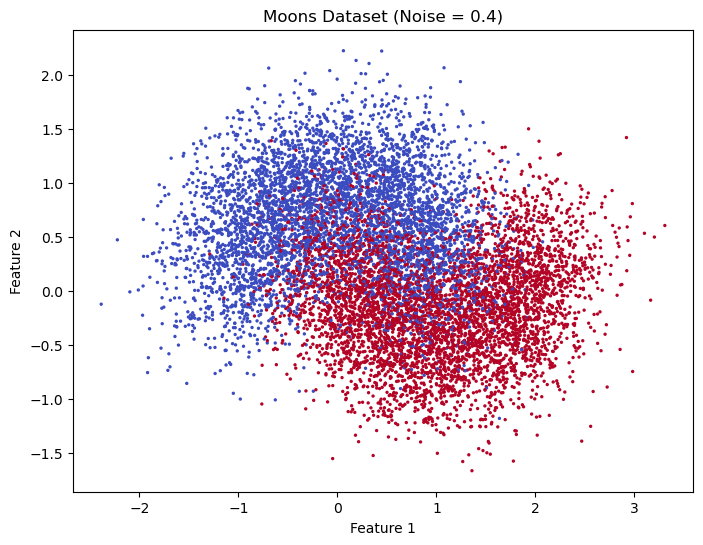

In [2]:
#Exercise 7
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Generate moons dataset
X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=2)
plt.title("Moons Dataset (Noise = 0.4)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [3]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the sizes of the splits
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 8000 samples
Testing set size: 2000 samples


In [4]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
tree_clf = DecisionTreeClassifier(random_state=42)

In [7]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [1, 2, 4, 5, 6],
    'criterion': ['gini', 'entropy']
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=tree_clf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Display the best parameters and corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.8530000000000001


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
360 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py", line 666, in _val

In [10]:
from sklearn.model_selection import cross_val_score

final_modal = grid_search.best_estimator_
cv_scores = cross_val_score(final_modal, X, y, cv=5, scoring='accuracy')

# Display the cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Standard Deviation of CV Accuracy:", cv_scores.std())

Cross-Validation Scores: [0.864  0.8505 0.8405 0.866  0.863 ]
Mean CV Accuracy: 0.8568000000000001
Standard Deviation of CV Accuracy: 0.009801020355044656


In [11]:
#Exercise 8
from sklearn.model_selection import ShuffleSplit
import numpy as np

# Define ShuffleSplit
shuffle_split = ShuffleSplit(n_splits=1000, train_size=100, random_state=42)

# Generate subsets
subsets = []
for train_index, _ in shuffle_split.split(X_train):
    X_subset = X_train[train_index]
    y_subset = y_train[train_index]
    subsets.append((X_subset, y_subset))

# Check the number of subsets and the size of the first subset
print(f"Number of subsets generated: {len(subsets)}")
print(f"Size of the first subset: {subsets[0][0].shape[0]} instances")

Number of subsets generated: 1000
Size of the first subset: 100 instances


In [13]:
best_params = grid_search.best_params_
optimized_tree_clf = DecisionTreeClassifier(**best_params, random_state=42)
list_of_dt = []

for i in range(1000):
    dt = DecisionTreeClassifier(**best_params, random_state=42)
    X_subset, y_subset = subsets[i]
    dt.fit(X_subset, y_subset)
    list_of_dt.append(dt)

list_of_dt

[DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4, random_state=42),
 DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4, random_state=42),
 DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4, random_state=42),
 DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4, random_state=42),
 DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4, random_state=42),
 DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4, random_state=42),
 DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4, random_state=42),
 DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4, random_state=42),
 DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4, random_state=42),
 DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4, random_state=42),
 DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4, random_state=42),
 DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4, random_state=42),
 DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4, random_state=42),
 DecisionTreeClassifier(max_depth=3, max_leaf_nodes

In [14]:
from sklearn.metrics import accuracy_score

# Assuming X_test and y_test are your test set features and labels
accuracies = []

# Loop through all trained Decision Trees and evaluate them
for tree_clf in list_of_dt:
    y_pred = tree_clf.predict(X_test)  # Predict using the test set
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    accuracies.append(accuracy)  # Store the accuracy

# Calculate the average accuracy across all models
average_accuracy = sum(accuracies) / len(accuracies)

# Optionally, you can also inspect the distribution of accuracies
print("Average accuracy of 1,000 Decision Trees on the test set:", average_accuracy)


Average accuracy of 1,000 Decision Trees on the test set: 0.8347645000000012


In [22]:
from scipy import stats

predictions = []

for tree_clf in list_of_dt:
    y_pred = tree_clf.predict(X_test)  
    predictions.append(y_pred)

# Use stats.mode to get the majority vote (most common prediction) across all trees
majority_vote = stats.mode(predictions, axis=0, keepdims=False)

# The most common prediction and its frequency
y_pred_majority = majority_vote.mode  # This gives the most frequent class for each sample

In [23]:
y_pred_majority

array([1, 1, 0, ..., 0, 0, 0])

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the accuracy of the majority vote predictions
accuracy = accuracy_score(y_test, y_pred_majority)

# Print the accuracy
print("Accuracy of the majority voting model on the test set:", accuracy)

# Detailed classification report (precision, recall, f1-score, support)
print("Classification Report:")
print(classification_report(y_test, y_pred_majority))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_majority))

Accuracy of the majority voting model on the test set: 0.8715
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1013
           1       0.87      0.88      0.87       987

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000

Confusion Matrix:
[[879 134]
 [123 864]]
